In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
terror=pd.read_csv('./global_terrorism_clean.csv')
terror = terror.query("type!='unknown'")
terror.date = terror.date.apply(lambda val: datetime.datetime.strptime(val, "%Y-%m-%d"))

In [3]:
terror.head()

,date,type,dead,injured,location,details,perpetrator
0,1970-01-13,shooting,7,0,"Urabá, Colombia",An UH-1 Iroquois helicopter from the Colombian...,EPL
1,1970-02-08,bombing,0,0,"Belfast, Northern Ireland",A bomb explodes at the home of Ulster Liberal ...,Ulster Volunteer Force
2,1970-02-10,bombing,1,23,"Munich, West Germany",A bus carrying passengers to an El Al airplane...,PDFLP
3,1970-02-18,bombing,0,0,"County Donegal, Republic of Ireland",A bomb detonated in a TV station that transmit...,Ulster Volunteer Force
4,1970-02-21,bombing,47,0,Switzerland,A bomb explodes in the rear of Swissair Flight...,PFLP-GC


In [4]:
# Finding the dead_counts for Various terror groups

In [5]:
perpetrators = terror.groupby(['perpetrator']).agg({'dead':np.sum})
perpetrators = perpetrators.sort_values(by=['dead'],ascending=False).reset_index(drop=False)
perpetrators.head()

,perpetrator,dead
0,Islamic State,18572
1,Boko Haram,7741
2,Taliban,5545
3,Unknown,3979
4,Kataeb Party,3960


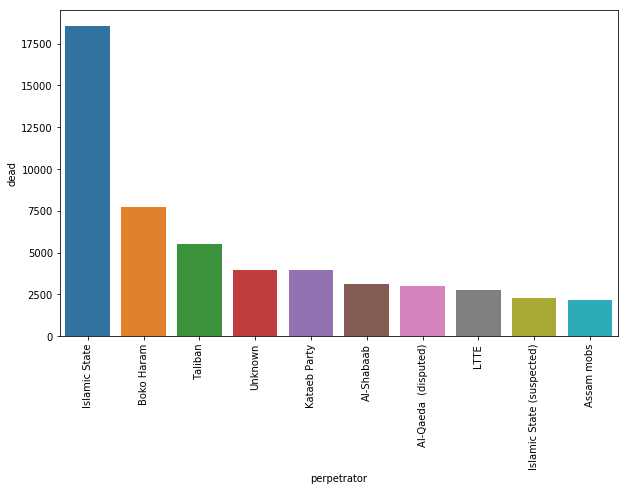

In [8]:
plt.figure(figsize=(10,6))
sns.barplot(x=perpetrators['perpetrator'][0:10],y=perpetrators['dead'][0:100])
plt.xticks(rotation=90)
plt.show()

In [9]:
#Perpetrators_Pivot = pd.pivot_table(TerrorDTframe,values=['Dead'],index=['Perpetrators'],aggfunc=np.sum)
#Perpetrators_Pivot

In [10]:
# Plotting the type of crime wrt count of the type of crime committed

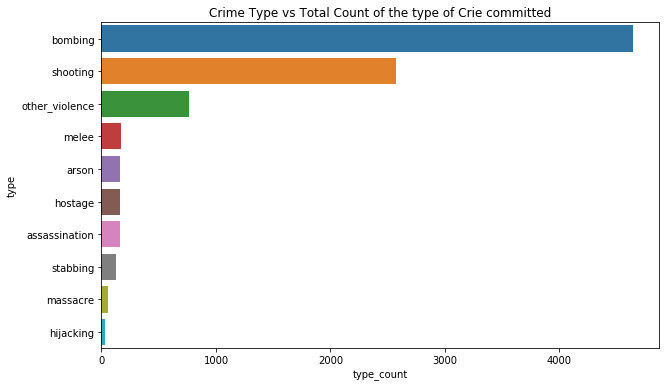

In [11]:
attack_count = terror.type.value_counts().to_frame().reset_index(drop=False)\
                                                            .rename(columns={'index':'type','type':'type_count'})
plt.figure(figsize=(10,6))
sns.barplot(y=attack_count['type'][0:10],x=attack_count['type_count'][0:10])
plt.title('Crime Type vs Total Count of the type of Crie committed')
plt.show()

In [12]:
# Finding out in which location , the dead_count is the most

In [13]:
dead_loc = terror.groupby(['location']).agg({'dead':np.sum})
dead_loc = dead_loc.sort_values(by=['dead'],ascending=False).reset_index(drop=False)
dead_loc.head()

,location,dead
0,"Beirut, Lebanon",4627
1,"Baghdad, Iraq",3555
2,"Mosul, Iraq",3498
3,United States,3006
4,"Assam, India",2197


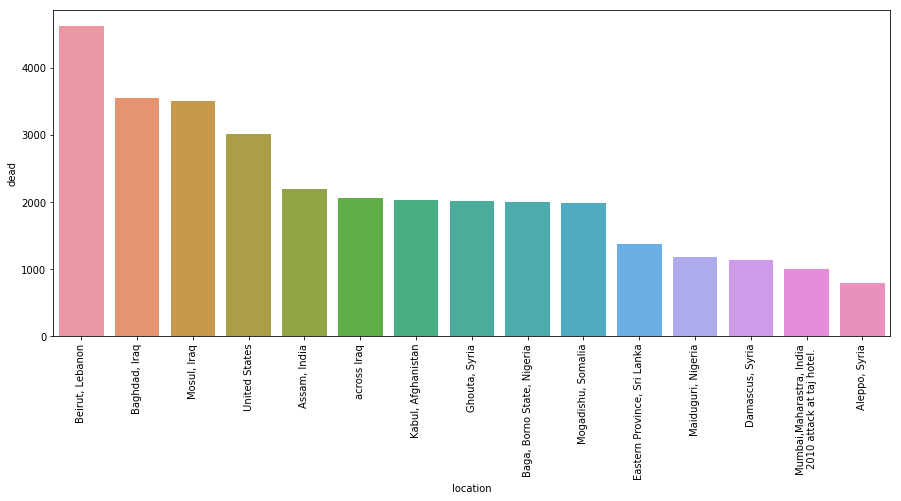

In [14]:
plt.figure(figsize=(15,6))
sns.barplot(x=dead_loc['location'][0:15],y=dead_loc['dead'][0:15])
plt.xticks(rotation=90)
plt.show()

In [15]:
# the most deadly terrorist attack
sorted_terror = terror.sort_values(by=['dead'],ascending=False).reset_index(drop=False)
sorted_terror.head()

,index,date,type,dead,injured,location,details,perpetrator
0,324,1982-09-16,massacre,3960,0,"Beirut, Lebanon",Hundreds of Palestinian and Lebanese Shi'a civ...,Kataeb Party
1,775,2001-09-11,hijacking,2996,6000,United States,"September 11 attacks: kill 2,977 victims and 1...",Al-Qaeda (disputed)
2,331,1983-02-18,other_violence,2191,0,"Assam, India","A massacre claimed the lives of 2,191 people (...",Assam mobs
3,2178,2013-08-21,other_violence,2010,3600,"Ghouta, Syria",A series of chemical attacks were conducted in...,Syrian Arab Army / Syrian rebels (suspected)
4,2474,2015-01-03,massacre,2000,0,"Baga, Borno State, Nigeria",2015 Baga massacre: Boko Haram militants opene...,Boko Haram


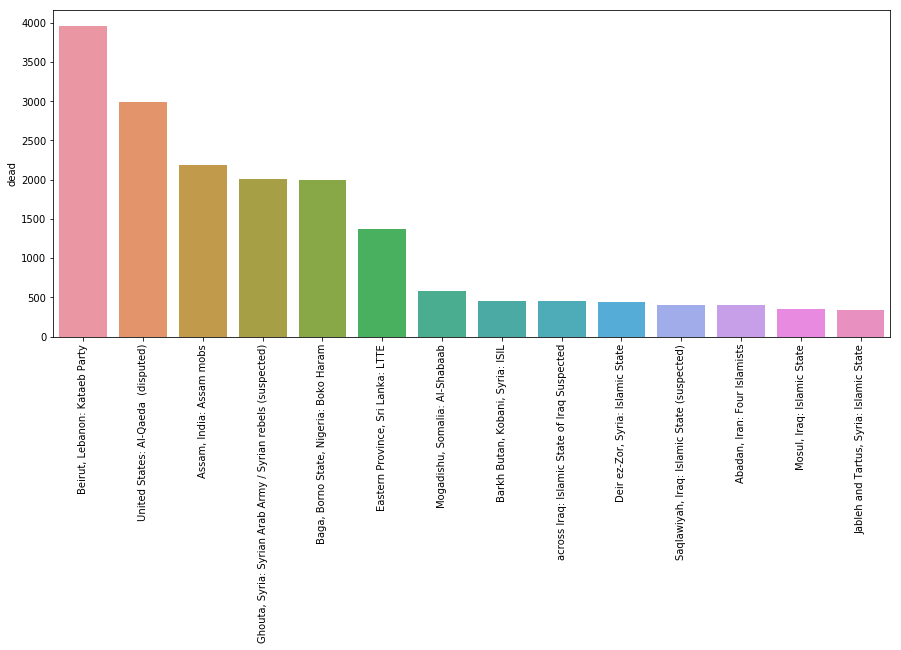

In [16]:
plt.figure(figsize=(15,6))
sns.barplot(x=sorted_terror['location'][0:15] + ": " + sorted_terror['perpetrator'][0:15],y=sorted_terror['dead'][0:15])
plt.xticks(rotation=90)
plt.show()

In [17]:
# Deadliest type of terror
average_death_by_type = terror.groupby(['type']).agg({'dead':np.mean})
average_death_by_type = average_death_by_type.sort_values(by=['dead'],ascending=False).reset_index(drop=False)
average_death_by_type.head()
# terror.groupby("type").count()

,type,dead
0,massacre,196.377358
1,hijacking,97.909091
2,other_violence,21.261155
3,bombing,10.651368
4,shooting,7.884346


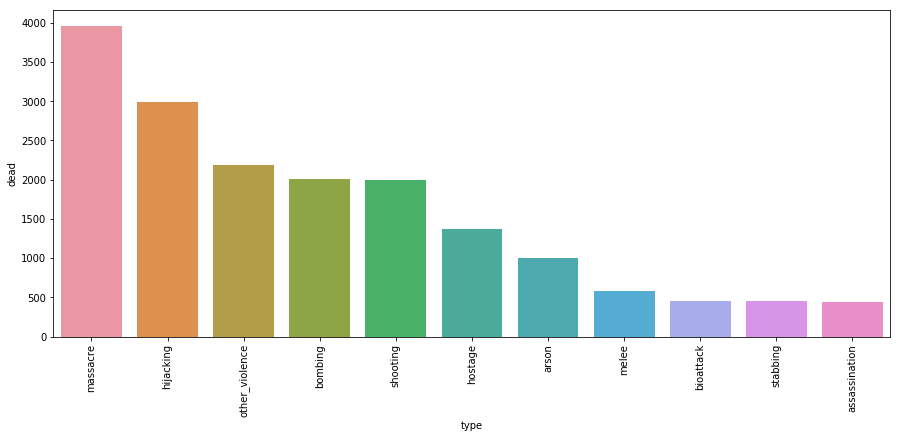

In [18]:
plt.figure(figsize=(15,6))
sns.barplot(x=average_death_by_type['type'] ,y=sorted_terror['dead'])
plt.xticks(rotation=90)
plt.show()

In [19]:
year_grouped = terror.groupby(terror.date.dt.year).agg({"dead": np.sum})
year_grouped = year_grouped.sort_values(by=['dead'],ascending=False).reset_index(drop=False)
year_grouped.head()

,date,dead
0,2016,18959
1,2018,12141
2,2017,11253
3,2015,8028
4,2013,6842


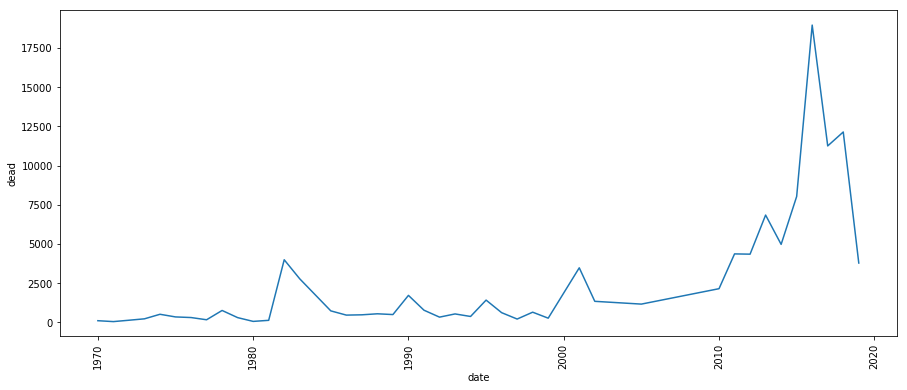

In [20]:
plt.figure(figsize=(15,6))
sns.lineplot(x=year_grouped['date'] ,y=year_grouped['dead'])
plt.xticks(rotation=90)
plt.show()

In [21]:
year_count = terror.groupby(terror.date.dt.year).size().reset_index(name='count')
year_count.head()
year_count = year_count.sort_values(by=['count'],ascending=False).reset_index(drop=False)
year_count.head()

,index,date,count
0,40,2018,2328
1,38,2016,1798
2,39,2017,1623
3,41,2019,673
4,37,2015,421


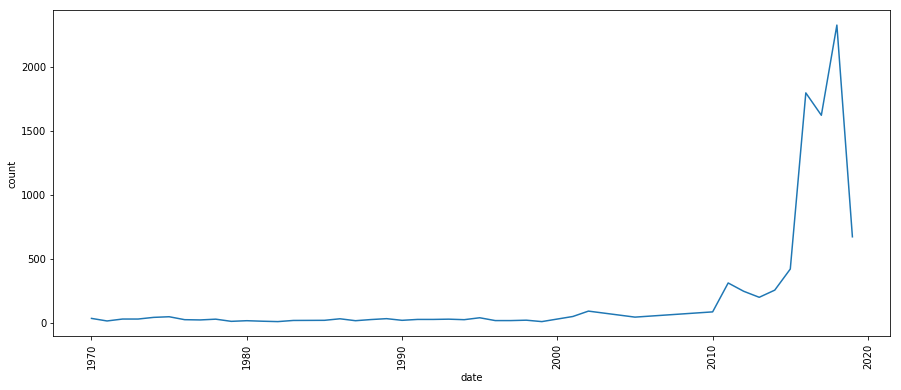

In [22]:
plt.figure(figsize=(15,6))
sns.lineplot(x=year_count['date'] ,y=year_count['count'])
plt.xticks(rotation=90)
plt.show()

In [23]:
year_dead = terror.groupby(terror.date.dt.year).agg({"dead": np.mean})
year_dead.head()
year_dead = year_dead.sort_values(by=['dead'],ascending=False).reset_index(drop=False)
year_dead.head()

,date,dead
0,1982,399.200000
1,1983,146.105263
2,1990,86.000000
3,2001,69.580000
4,1985,36.600000


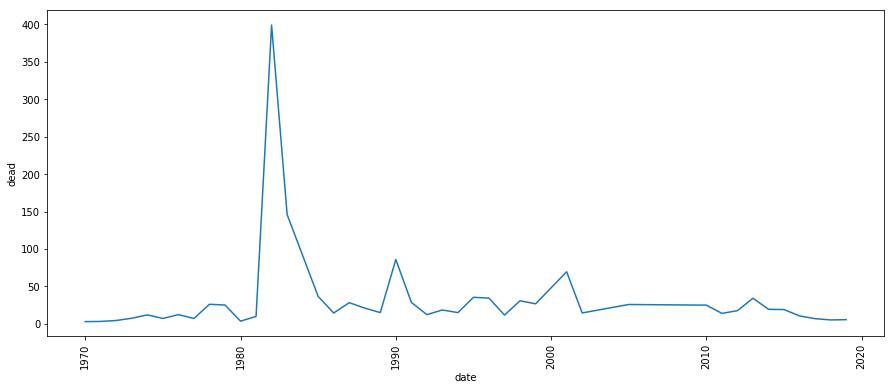

In [24]:
plt.figure(figsize=(15,6))
sns.lineplot(x=year_dead['date'] ,y=year_dead['dead'])
plt.xticks(rotation=90)
plt.show()

In [40]:
year_grouped.sort_values(by="date", ascending=False)
display(year_grouped.head())
terror[terror.date.dt.year == 2019].location.unique().size

,date,dead
0,2016,18959
1,2018,12141
2,2017,11253
3,2015,8028
4,2013,6842


428

In [94]:
terror_features=pd.read_csv('./RefinedTerrorData.csv')
# display(terror_features.Perpetrators.values.tolist())
terror_features_nona = X.replace([np.inf, -np.inf], np.nan)
terror_features_nona = terror_features.dropna()
display(terror_features_nona.head())
X = terror_features_nona.loc[:, terror_features_nona.columns != "Perpetrators"]

,0,1,2,3,4,5,6,7,8,9,...,Location_Ukraine,Location_United Arab Emirates,Location_United Kingdom,Location_United States,Location_Uruguay,Location_Uzbekistan,Location_West Bank,Location_Yemen,Location_Zimbabwe,Perpetrators
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,EPL
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,Ulster Volunteer Force
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,PDFLP
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,Ulster Volunteer Force
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,PFLP-GC


In [88]:
# from sklearn.cluster import AffinityPropagation
# ap = AffinityPropagation().fit(X)

In [98]:
from sklearn import metrics
# display(terror_features.Perpetrators.values.tolist())
labels_true = terror_features_nona.Perpetrators.values.tolist()
# display(labels_true)
cluster_centers_indices = ap.cluster_centers_indices_
labels = ap.labels_
n_clusters_ = len(cluster_centers_indices)
# display(len(labels))
# display(len(labels_true))
print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels, metric='sqeuclidean'))

Estimated number of clusters: 2732
Homogeneity: 0.753
Completeness: 0.550
V-measure: 0.635
Adjusted Rand Index: 0.036


/home/josephditton/.asdf/installs/python/3.6.2/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Adjusted Mutual Information: 0.197
Silhouette Coefficient: 0.154
